In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("current_df.csv")
print(df.shape)
df.head()

(1691, 19)


,Unnamed: 0,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,Number of Binding Alleles,protein_sequence,immunogenicity_score,antigen_score,probable_type,aff_score,pro_score,imm_score,rank,bcell_assays,tcell_assays,mch_assays
0,0,HLA-A*02:06,WITGGIAIA,477.01,P0DTC5,490.846563,0.072916,2,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.31576,0.8209,ANTIGEN,483.928281,0.072916,0.568330,147.356275,NaN,NaN,NaN
1,1,HLA-A*01:01,SASFSTFKCY,461.61,P0DTC2,479.191188,0.108789,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.16250,0.3271,NON-ANTIGEN,470.400594,0.108789,0.082300,143.155747,NaN,NaN,NaN
2,2,HLA-A*30:02,VLPFNDGVY,445.75,P0DTC2,492.441910,0.039136,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.18150,0.4642,NON-ANTIGEN,469.095955,0.039136,0.322850,142.829555,NaN,NaN,NaN
3,3,HLA-A*11:01,IASFRLFAR,486.58,P0DTC5,434.067863,0.300376,4,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.22572,0.0646,NON-ANTIGEN,460.323932,0.300376,0.145160,142.170765,NaN,NaN,NaN
4,4,HLA-B*15:01,RLQSLQTY,462.12,P0DTC2,477.421085,0.412814,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.29115,0.0589,NON-ANTIGEN,469.770542,0.412814,-0.116125,141.937607,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1691 non-null   int64  
 1   allele                      1691 non-null   object 
 2   peptide                     1691 non-null   object 
 3   iedb_aff                    1691 non-null   float64
 4   protein_id                  1691 non-null   object 
 5   mhcflurry_aff               1691 non-null   float64
 6   mhcflurry_processing_score  1691 non-null   float64
 7   Number of Binding Alleles   1691 non-null   int64  
 8   protein_sequence            1691 non-null   object 
 9   immunogenicity_score        1691 non-null   float64
 10  antigen_score               1691 non-null   float64
 11  probable_type               1691 non-null   object 
 12  aff_score                   1691 non-null   float64
 13  pro_score                   1691 

In [3]:
df_pc = pd.read_csv('epitopes_pop_coverage_2697049.tsv', sep = '\t')
df_pc

,Epitope,Coverage
0,AAAYYVGYL,49.43%
1,AALQIPFAM,41.74%
2,AAVYRINWI,14.75%
3,ACFVLAAVY,0.17%
4,AEIRASANL,31.90%
...,...,...
634,YYHKNNKSW,22.91%
635,YYKLGASQR,5.60%
636,YYLGTGPEA,2.04%
637,YYRRATRRI,22.91%


In [4]:
df_pc['Coverage'] = df_pc['Coverage'].apply(lambda x:x[:-1])
df_pc['Coverage'] = pd.to_numeric(df_pc['Coverage'])
df_pc

,Epitope,Coverage
0,AAAYYVGYL,49.43
1,AALQIPFAM,41.74
2,AAVYRINWI,14.75
3,ACFVLAAVY,0.17
4,AEIRASANL,31.90
...,...,...
634,YYHKNNKSW,22.91
635,YYKLGASQR,5.60
636,YYLGTGPEA,2.04
637,YYRRATRRI,22.91


In [6]:
len(df_pc['Epitope'].unique())

639

In [5]:
merged_df = pd.merge(df, df_pc, left_on='peptide', right_on='Epitope', how='inner')
merged_df.head() 

,Unnamed: 0,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,Number of Binding Alleles,protein_sequence,immunogenicity_score,...,probable_type,aff_score,pro_score,imm_score,rank,bcell_assays,tcell_assays,mch_assays,Epitope,Coverage
0,0,HLA-A*02:06,WITGGIAIA,477.01,P0DTC5,490.846563,0.072916,2,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.31576,...,ANTIGEN,483.928281,0.072916,0.56833,147.356275,NaN,NaN,NaN,WITGGIAIA,0.00
1,175,HLA-A*02:03,WITGGIAIA,175.02,P0DTC5,415.238575,0.072916,2,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.31576,...,ANTIGEN,295.129288,0.072916,0.56833,90.716577,NaN,NaN,NaN,WITGGIAIA,0.00
2,2,HLA-A*30:02,VLPFNDGVY,445.75,P0DTC2,492.441910,0.039136,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.18150,...,NON-ANTIGEN,469.095955,0.039136,0.32285,142.829555,NaN,NaN,NaN,VLPFNDGVY,11.58
3,375,HLA-B*15:01,VLPFNDGVY,276.42,P0DTC2,191.746750,0.039136,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.18150,...,NON-ANTIGEN,234.083375,0.039136,0.32285,72.325781,NaN,NaN,NaN,VLPFNDGVY,11.58
4,3,HLA-A*11:01,IASFRLFAR,486.58,P0DTC5,434.067863,0.300376,4,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.22572,...,NON-ANTIGEN,460.323932,0.300376,0.14516,142.170765,NaN,NaN,NaN,IASFRLFAR,22.25


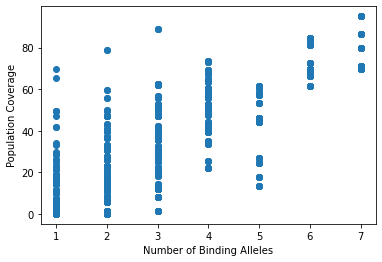

In [8]:
plt.scatter(merged_df['Number of Binding Alleles'], merged_df['Coverage'])
plt.xlabel('Number of Binding Alleles')
plt.ylabel('Population Coverage')
plt.show()

<AxesSubplot:xlabel='Number of Binding Alleles', ylabel='Coverage'>

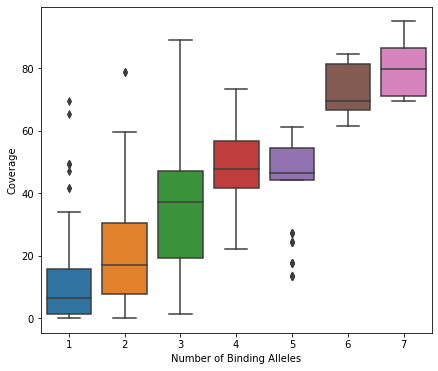

In [12]:
plt.figure(figsize = (7, 6))
sns.boxplot(x = 'Number of Binding Alleles', y = 'Coverage', data = merged_df)

The coverage increases wrt number of binding alleles

<AxesSubplot:>

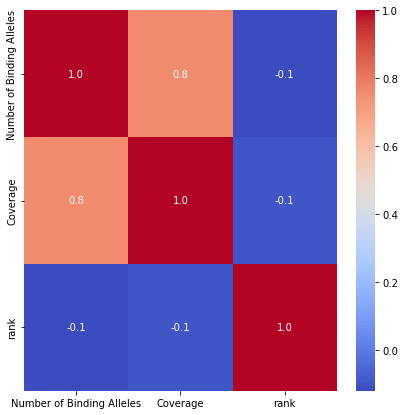

In [14]:
correlation = merged_df[['Number of Binding Alleles', 'Coverage', 'rank']].corr()
plt.figure(figsize = (7, 7))
sns.heatmap(data = correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')

<AxesSubplot:xlabel='Coverage', ylabel='Count'>

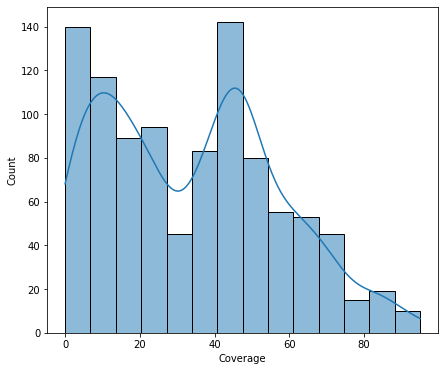

In [24]:
plt.figure(figsize = (7, 6))
sns.histplot(merged_df['Coverage'], kde = True)

Most of the coverages are below 60%

<AxesSubplot:xlabel='protein_id', ylabel='Coverage'>

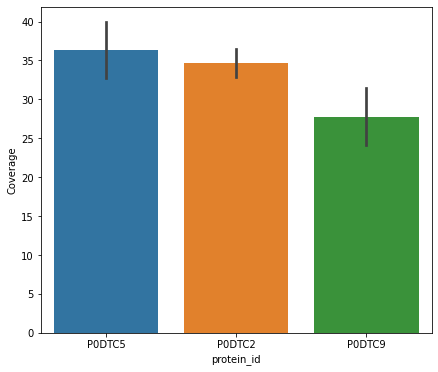

In [17]:
plt.figure(figsize = (7, 6))
sns.barplot(data = merged_df, y = 'Coverage', x = 'protein_id')

Peptides derived from P0DTC5 have max coverage

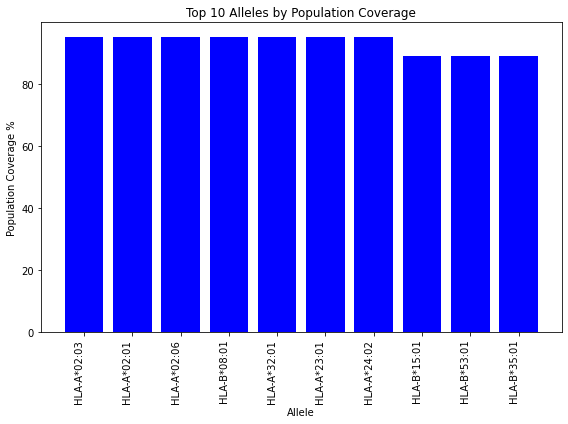

In [7]:

# Sort alleles by population coverage percentage
sorted_alleles = merged_df.sort_values(by='Coverage', ascending=False)
top_alleles = sorted_alleles.head(10)

# Create bar plot of population coverage percentage
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(top_alleles['allele'], top_alleles['Coverage'], color='blue')
ax.set_xlabel('Allele')
ax.set_ylabel('Population Coverage %')
ax.set_title('Top 10 Alleles by Population Coverage')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


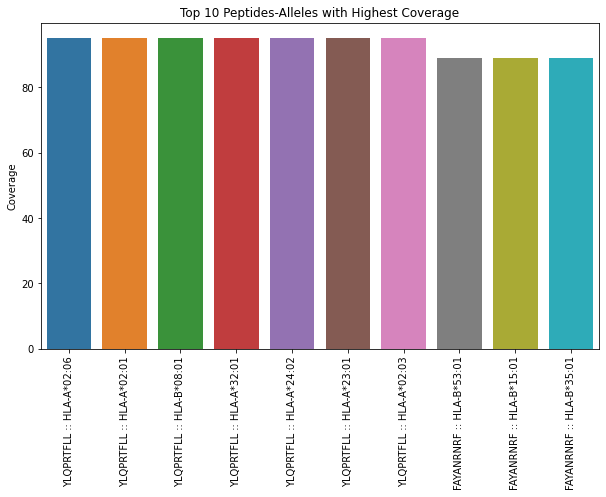

In [20]:
af = merged_df.groupby(['peptide', 'allele'])['Coverage'].mean().sort_values(ascending = False)[:10]
li = []
for i in range(len(af)):
    c = ' :: '.join(af.index[i])
    li.append(c)
plt.figure(figsize=(10, 6))
sns.barplot(li, af.values[:10])
plt.title(f'Top 10 Peptides-Alleles with Highest Coverage')
plt.ylabel('Coverage')
plt.xticks(rotation=90)
plt.show()

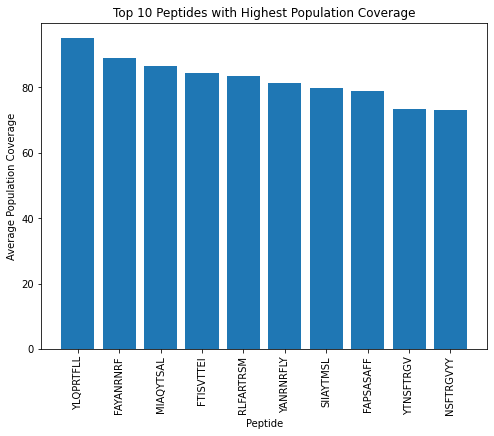

In [6]:
peptide_coverage = merged_df.groupby('peptide')['Coverage'].mean()
sorted_peptides = peptide_coverage.sort_values(ascending=False)

# Get the top 10 peptides with highest average population coverage
top_peptides = sorted_peptides[:10]

# Plot the top peptides and their average population coverage
plt.figure(figsize=(8, 6))
plt.bar(top_peptides.index, top_peptides.values)
plt.xlabel('Peptide')
plt.ylabel('Average Population Coverage')
plt.xticks(rotation = 90)
plt.title('Top 10 Peptides with Highest Population Coverage')
plt.show()

<AxesSubplot:xlabel='Coverage', ylabel='rank'>

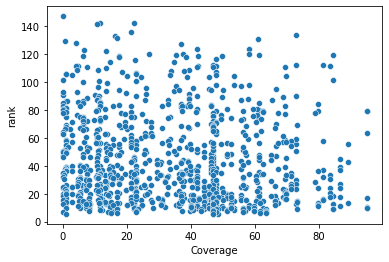

In [9]:
sns.scatterplot(x = 'Coverage', y = 'rank', data = merged_df)

<AxesSubplot:xlabel='Coverage', ylabel='aff_score'>

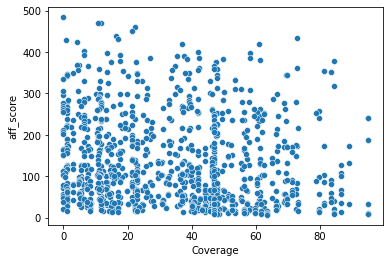

In [10]:
sns.scatterplot(x = 'Coverage', y = 'aff_score', data = merged_df)

<AxesSubplot:xlabel='Coverage', ylabel='pro_score'>

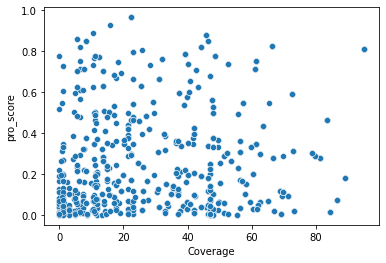

In [11]:
sns.scatterplot(x = 'Coverage', y = 'pro_score', data = merged_df)

<AxesSubplot:xlabel='Coverage', ylabel='imm_score'>

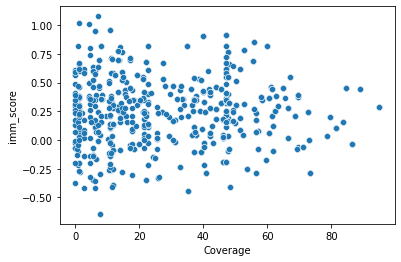

In [12]:
sns.scatterplot(x = 'Coverage', y = 'imm_score', data = merged_df)